# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [3]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [5]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

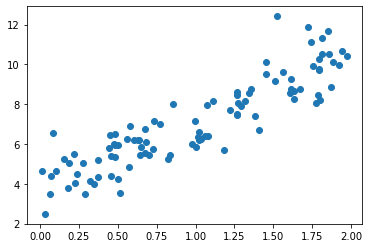

In [6]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [7]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [9]:
#X_fit[]

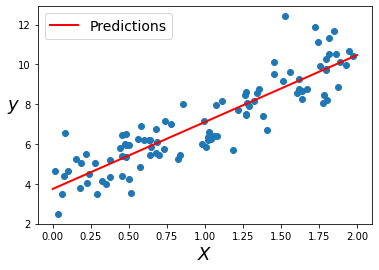

In [10]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [11]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [12]:
X_new.shape

(2, 1)

In [13]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [14]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [15]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [16]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

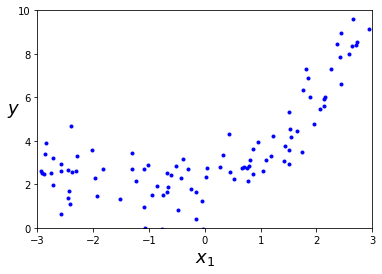

In [17]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [18]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [21]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [22]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [23]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

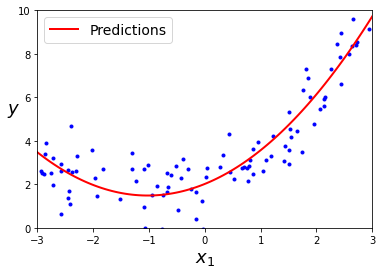

In [24]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [25]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [26]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [28]:
len(X)

1000

In [29]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

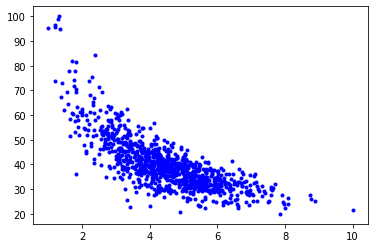

In [30]:
plt.plot(X,y,'b.')

In [31]:
#lineal
lr = LinearRegression(fit_intercept=True)

# Entrenamos el modelo
lr.fit(X_train,y_train)

# Elementos de su ecuación
print('Coeficiente: ',lr.coef_)
print('Termino independiente: ',lr.intercept_)

Coeficiente:  [-5.98882699]
Termino independiente:  66.83650741226988


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


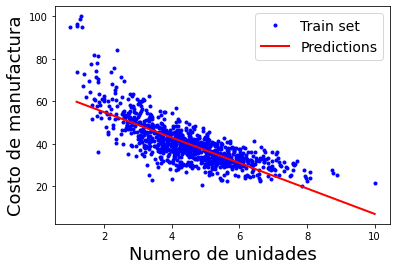

In [32]:
# Se calcula el intervalo del conjunto de puntos y se realiza la predicción de acuerdo a esos valores
X_range = np.linspace(X_train.min(),X_train.max(),100).reshape(100,1)
y_pred = lr.predict(X_range)

# Se muestra el conjunto de entrenamiento y la linea ajustada a los puntos dentro del intervalo
plt.plot(X,y,'b.', label= 'Train set')
plt.plot(X_range, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("Numero de unidades", fontsize=18)
plt.ylabel("Costo de manufactura", rotation=90, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score

def error_metrics(y, y_pred, model, is_set = 'training'):
  mae = metrics.mean_absolute_error(y, y_pred)
  smae = np.sqrt(mae)
  r2 = r2_score(y, y_pred)
  print(model, ' ', is_set)
  print('Error medio Absoluto (MAE):', mae)
  print('Root Mean Squared Error:', smae)
  print('r2_score',r2)
  return mae, smae, r2

lr_y_pred = lr.predict(X_train)

lr_train_mae, lr_train_smae, lr_train_r2 = error_metrics(y_train, lr_y_pred, 'Linear regression', 'training')

lr_y_test = lr.predict(X_test)
lr_test_mae, lr_test_smae, lr_test_r2 = error_metrics(y_test, lr_y_test, 'Linear regression', 'test')



Linear regression   training
Error medio Absoluto (MAE): 4.905332101451236
Root Mean Squared Error: 2.2147984335941806
r2_score 0.5746524649404298
Linear regression   test
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 2.2391042365095384
r2_score 0.6116251549562579


In [34]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_params=PolynomialFeatures(degree=3,include_bias=False)
X_train_pol=poly_params.fit_transform(X_train)
lrp=LinearRegression(fit_intercept=True)
lrp.fit(X_train_pol,y_train)
y_hat_pol=lrp.predict(X_train_pol)
X_test_pol=poly_params.fit_transform(X_test)
y_hat_pol_test=lrp.predict(X_test_pol)

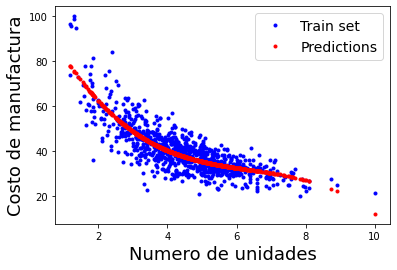

In [35]:
# Se muestra el conjunto de entrenamiento y la linea ajustada a los puntos dentro del intervalo
plt.plot(X_train, y_train,'b.', label= 'Train set')
plt.plot(X_train, y_hat_pol, "r.", label="Predictions")
plt.xlabel("Numero de unidades", fontsize=18)
plt.ylabel("Costo de manufactura", rotation=90, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

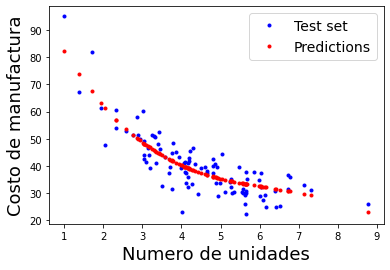

In [36]:
plt.plot(X_test, y_test,'b.', label= 'Test set')
plt.plot(X_test, y_hat_pol_test, "r.", label="Predictions")
plt.xlabel("Numero de unidades", fontsize=18)
plt.ylabel("Costo de manufactura", rotation=90, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [37]:
lrp_train_mae, lrp_train_smae, lrp_train_r2 = error_metrics(y_train, y_hat_pol, 'Poly regression', 'training')

lrp_y_test = lrp.predict(X_test_pol)
lrp_test_mae, lrp_test_smae, lrp_test_r2 = error_metrics(y_test, y_hat_pol_test, 'Poly regression', 'test')

Poly regression   training
Error medio Absoluto (MAE): 4.473380039079886
Root Mean Squared Error: 2.115036651947168
r2_score 0.6767502235900188
Poly regression   test
Error medio Absoluto (MAE): 4.386320983977357
Root Mean Squared Error: 2.09435455068557
r2_score 0.7672025391579643


In [38]:
# Elementos de su ecuación
print('Coeficientes: ',lrp.coef_)
print('Termino independiente: ',lrp.intercept_)

Coeficientes:  [-32.54637447   4.74715887  -0.24753202]
Termino independiente:  110.3994754620544


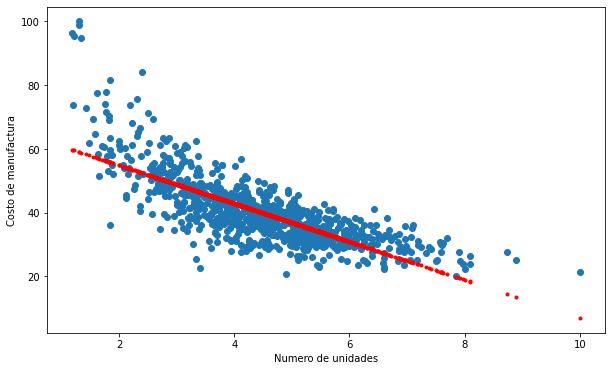

In [39]:
# Ridge
from sklearn.linear_model import Ridge

ridgeReg = Ridge()
ridgeReg.fit(X_train, y_train)

y_hat_ridge = ridgeReg.predict(X_train)
y_hat_ridge_test = ridgeReg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_ridge, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

In [40]:
ridge_train_mae, ridge_train_smae, ridge_train_r2 = error_metrics(y_train, y_hat_ridge, 'Ridge', 'training')
ridge_test_mae, ridge_test_smae, ridge_test_r2 = error_metrics(y_test, y_hat_ridge_test, 'Ridge', 'test')

Ridge   training
Error medio Absoluto (MAE): 4.904816504923723
Root Mean Squared Error: 2.214682032465095
r2_score 0.5746522374526246
Ridge   test
Error medio Absoluto (MAE): 5.014112691100099
Root Mean Squared Error: 2.239221447534857
r2_score 0.611578926493084


In [41]:
# Coeficientes e intercept de Ridge
print(f'Coeficiente: {ridgeReg.coef_}')
print(f'Intercepto: {ridgeReg.intercept_}')

Coeficiente: [-5.98505893]
Intercepto: 66.81965008652344


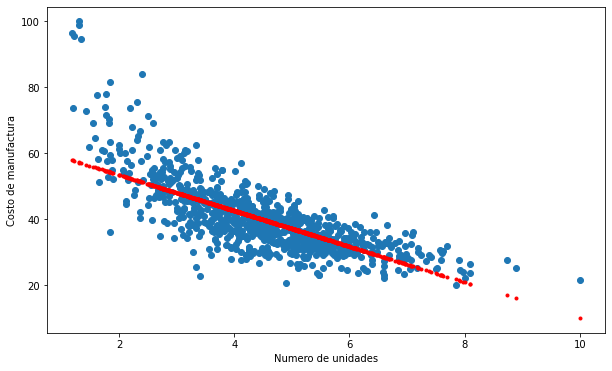

In [42]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_hat_lasso = lasso.predict(X_train)
y_hat_lasso_test = lasso.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_lasso, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

In [43]:
#formula de la regresion lasso
print(f'Coeficiente: {lasso.coef_}')
print(f'Intercepto: {lasso.intercept_}')

Coeficiente: [-5.42220651]
Intercepto: 64.30159616857074


In [44]:
lasso_train_mae, lasso_train_smae, lasso_train_r2 = error_metrics(y_train, y_hat_lasso, 'Lasso', 'training')
lasso_test_mae, lasso_test_smae, lasso_test_r2 = error_metrics(y_test, y_hat_lasso_test, 'Lasso', 'test')

Lasso   training
Error medio Absoluto (MAE): 4.856264165232118
Root Mean Squared Error: 2.2036933010816453
r2_score 0.569508401951628
Lasso   test
Error medio Absoluto (MAE): 5.092520710815617
Root Mean Squared Error: 2.2566614081017153
r2_score 0.5998847335404536


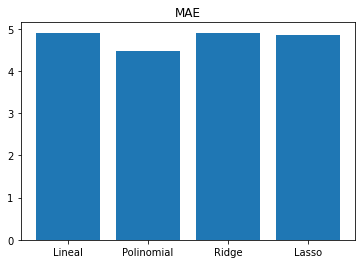

In [45]:
names = ['Lineal', 'Polinomial', 'Ridge', 'Lasso']
def error_plot(errors, metric, names):
  plt.title(metric)
  plt.bar(names, errors)

error_plot([lr_train_mae, lrp_train_mae, ridge_train_mae, lasso_train_mae], 'MAE', names)

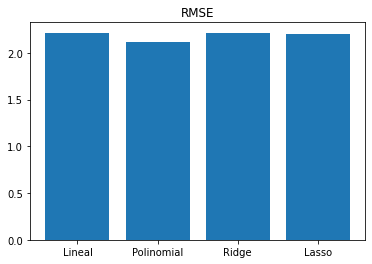

In [46]:
error_plot([lr_train_smae, lrp_train_smae, ridge_train_smae, lasso_train_smae], 'RMSE', names)

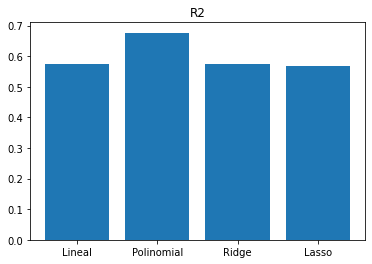

In [47]:
error_plot([lr_train_r2, lrp_train_r2, ridge_train_r2, lasso_train_r2], 'R2', names)

Evaluanto las tres metricas de error MAE, RMSE y R2 se puede observar que el modelo polinomial disminuye el error en las predicciones tanto en el conjunto de entrenamiento como en el de prueba, al visualizar los datos respecto a las variable y se pudo observar el comportamiento de la muestra no es del todo lineal y al aumentar la complejidad mediante el procesamiento de la variable independiente (X) se pudo obtener una curva para ajustarse a los datos.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [50]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


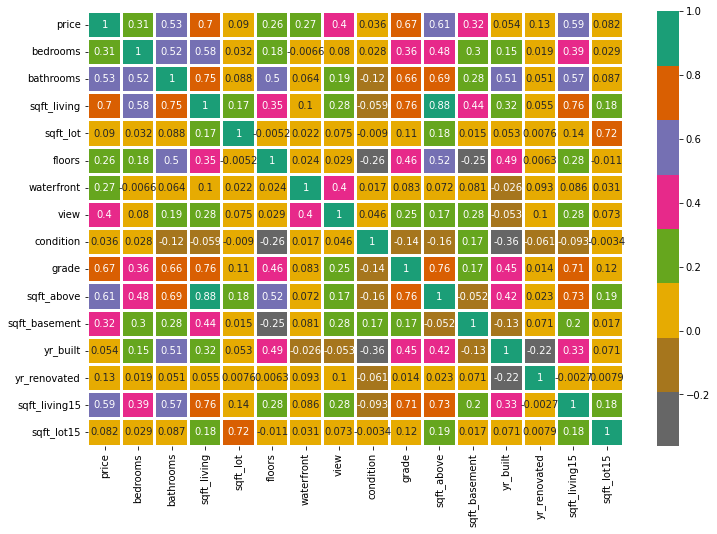

In [52]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [53]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [55]:
#tu codigo aquí
def getModelResult(model, X_train, y_train, X_test, y_test, model_name):
  model = model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  ############# Print coeficients and intercept #############
  print(f'Coeficiente: {model.coef_}')
  print(f'Intercepto: {model.intercept_}')

  ############# Print error metrics ########################
  model_train_mae, model_train_smae, model_train_r2 = error_metrics(y_train, y_pred_train, model_name, 'training')
  model_test_mae, model_test_smae, model_test_r2 = error_metrics(y_test, y_pred_test, model_name, 'test')
  
  return [model_train_mae, model_train_smae, model_train_r2], [model_test_mae, model_test_smae, model_test_r2]

In [57]:
lr = LinearRegression(fit_intercept=True)
lr_train_metrics, lr_test_metrics = getModelResult(lr, X_train, y_train, X_test, y_test, 'Linear Regression')

Coeficiente: [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Intercepto: [6151359.2627409]
Linear Regression   training
Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 373.1880616943096
r2_score 0.6529196653133833
Linear Regression   test
Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 370.78314258784445
r2_score 0.6579723205007814


In [ ]:
# Polynomial features and regression
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_pol = poly_features.fit_transform(X_train)
X_test_pol = poly_features.transform(X_test)
poly_model = LinearRegression(fit_intercept=True)
p_train_metrics, p_test_metrics = getModelResult(poly_model, X_train_pol, y_train, X_test_pol, y_test, 'Polynomial Regression')

In [59]:
ridge = Ridge()
r_train_metrics, r_test_metrics = getModelResult(ridge, X_train, y_train, X_test, y_test, 'Ridge Regression')

Coeficiente: [[-3.82192265e+04  4.14509656e+04  1.08013951e+02  1.69318239e-02
   3.16891574e+04  5.48258333e+05  4.14559235e+04  2.12264347e+04
   1.19470568e+05  4.78066878e+01  6.02065605e+01 -3.55050129e+03
   1.33171890e+01  2.89851987e+01 -5.47998512e-01]]
Intercepto: [6150751.3836867]
Ridge Regression   training
Error medio Absoluto (MAE): 139269.23633236173
Root Mean Squared Error: 373.18793701345936
r2_score 0.652918722779591
Ridge Regression   test
Error medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error: 370.797847073082
r2_score 0.6578783840295006


In [61]:
lasso = Lasso(alpha=1.0)
la_train_metrics, la_test_metrics = getModelResult(lasso, X_train, y_train, X_test, y_test, 'Lasso Regression')

Coeficiente: [-3.81995345e+04  4.14618568e+04  2.93480482e+02  1.71281822e-02
  3.16871411e+04  5.52541108e+05  4.12549654e+04  2.12193902e+04
  1.19491837e+05 -1.37708200e+02 -1.25268449e+02 -3.55085005e+03
  1.32628460e+01  2.90053298e+01 -5.48136075e-01]
Intercepto: [6151280.11390041]
Lasso Regression   training
Error medio Absoluto (MAE): 139269.3453828634
Root Mean Squared Error: 373.1880831201117
r2_score 0.652919664114342
Lasso Regression   test
Error medio Absoluto (MAE): 137480.57154885164
Root Mean Squared Error: 370.7837261111275
r2_score 0.6579689024340813


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


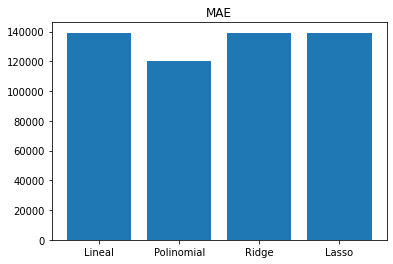

In [66]:
# Grafica de errores
error_plot([lr_train_metrics[0], p_train_metrics[0], r_train_metrics[0], la_train_metrics[0]], 'MAE', names)

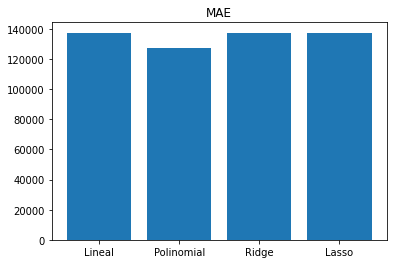

In [68]:
error_plot([lr_test_metrics[0], p_test_metrics[0], r_test_metrics[0], la_test_metrics[0]], 'MAE', names)

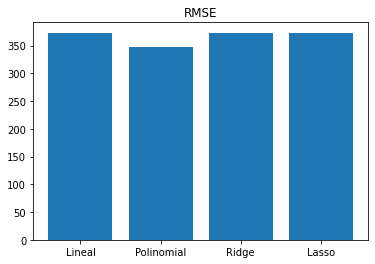

In [63]:
error_plot([lr_train_metrics[1], p_train_metrics[1], r_train_metrics[1], la_train_metrics[1]], 'RMSE', names)

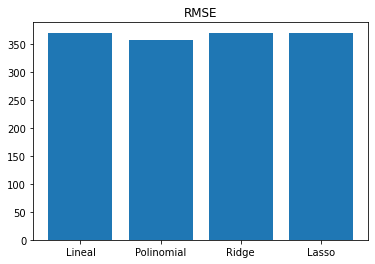

In [69]:
error_plot([lr_test_metrics[1], p_test_metrics[1], r_test_metrics[1], la_test_metrics[1]], 'RMSE', names)

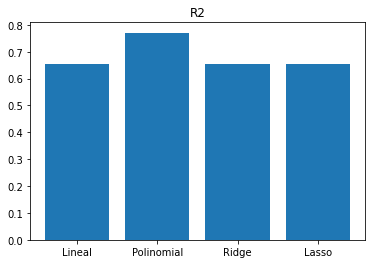

In [64]:
error_plot([lr_train_metrics[2], p_train_metrics[2], r_train_metrics[2], la_train_metrics[2]], 'R2', names)

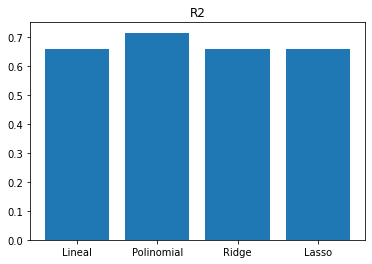

In [70]:
error_plot([lr_test_metrics[2], p_test_metrics[2], r_test_metrics[2], la_test_metrics[2]], 'R2', names)

En el caso de regresión multiple el modelo polinomial logró el menor error en el conjunto de entrenamiento y el modelo aumento su complejidad de procesamiento ya que en el procesamiento se calcularon las variables hasta el grado 3, lo cual igual puede llevar a un overfitting, sin embargo, este no fue el caso ya que en el conjunto de prueba el error igual fue mínimo, sin embargo, otra técnica que se puede implementar sería preprocesar los datos de manera polinomial y utilizarlos en ridge y lasso, la ventaja de estos métodos es que logran descartar features que no son relevantes para la predicción, llevando los coeficientes casi a cero, lo cual puede disminuir el tiempo de predicción.